[[ 0.57735027+0.00000000e+00j  0.81649658+0.00000000e+00j
   0.81649658+0.00000000e+00j]
 [ 0.57735027+1.86942350e-16j -0.40824829-1.20751371e-16j
  -0.40824829+4.78557057e-16j]
 [-0.57735027-1.85366893e-16j  0.40824829+6.99202847e-17j
   0.40824829+6.33681184e-16j]]


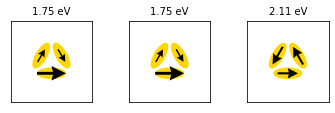

In [22]:
from coupled_harmonic_osc import CoupledOscillators
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse

def constants():
    # These constants are defined for fitting Drude to JC
    wp = 9. # eV, bulk plasma frequency 
    eps_inf = 9.7 # [unitless], static dielectric response of ionic background 
    gamNR_qs = 0.073 # non-radiative Drude damping [eV]
    eps_b = 1.**2 # background dielectric constant
    return np.array([wp, eps_inf, gamNR_qs, eps_b])

scale_radii=1
long_radii = 100*scale_radii
short_radii = 40*scale_radii

scale_triangle = 1.4
a = (2*long_radii*1E-7)*scale_triangle # length of equilateral triangle


num_part = 3
num_dip = 1
centers_1dip = np.array([[a/2, 0], [3*a/4, np.sqrt(3)*a/4], [a/4, np.sqrt(3)*a/4]]) # particle centers

unit_vecs_1dip = np.array([[1, 0], [-1/2, np.sqrt(3)/2], [1/2, np.sqrt(3)/2]]) # dipole orientations

centers = centers_1dip
unit_vecs = unit_vecs_1dip
coupled_dip = CoupledOscillators(constants(), # drude constants 
                                 num_part, # number of particles
                                 num_dip, # dipoles per particle
                                 centers,
                                 unit_vecs,
                                 np.array([int(long_radii)*1.E-7, int(long_radii)*1.E-7, int(long_radii)*1.E-7]), # radii
                                 np.array([1, 1, 1]), # kind
                                 int(short_radii)*1.E-7,
                                )


final_eigvals, final_eigvecs = coupled_dip.iterate()
# coupled_dip.see_vectors(final_eigvals, final_eigvecs)
fig = plt.figure(1, figsize=[6,1.5])

def see_vectors(final_eigvals, final_eigvecs, wind):
    """Plot the convereged eigenvectors."""
    dip_ycoords = centers[:,0]
    dip_zcoords = centers[:,1] 
    mat_size = int(num_dip*num_part) 
    w = final_eigvals[np.real(final_eigvals).argsort()] # sort the evals and evecs so that we are comparing the same eval/evec as the previous trial.
    v = final_eigvecs[:,np.real(final_eigvals).argsort()] # sort the evals and evecs so that we are comparing the same eval/evec as the previous trial.
    print(final_eigvecs[:,np.imag(final_eigvals).argsort()])
    for mode in range(0, mat_size):
        energy = np.real(w[mode]) # [eV]
        vector_mag = np.real(v[:,mode]) # [unitless]
        ax = fig.add_subplot(str(1)+str(mat_size)+str(mode+1), aspect='equal')
        ################################
        ################################
        ells = [Ellipse(xy=centers[0,:], width=2*short_radii*1E-7, height=2*long_radii*1E-7, angle=(np.pi/2+np.arctan2(unit_vecs[0,1], unit_vecs[0,0]))*180/np.pi),
                Ellipse(xy=centers[1,:], width=2*short_radii*1E-7, height=2*long_radii*1E-7, angle=(np.pi/2+np.arctan2(unit_vecs[1,1], unit_vecs[1,0]))*180/np.pi),
                Ellipse(xy=centers[2,:], width=2*short_radii*1E-7, height=2*long_radii*1E-7, angle=(np.pi/2+np.arctan2(unit_vecs[2,1], unit_vecs[2,0]))*180/np.pi)
               ]
        for e in ells:
            ax.add_artist(e)
            e.set_clip_box(ax.bbox)
            e.set_alpha(1)
            e.set_facecolor('gold')
        ################################
        plt.title('%.2f' % energy + ' eV', fontsize=10)
        p = vector_mag[...,np.newaxis]*unit_vecs
        if num_dip == 1: p_perpart = p
        else: p_perpart = p[:int(mat_size/num_dip),:] + p[int(mat_size/num_dip):,:] 
        plt.quiver(dip_ycoords[:int(mat_size/num_dip)], dip_zcoords[:int(mat_size/num_dip)], p_perpart[:,0], p_perpart[:,1], pivot='mid', 
            width=.5, #shaft width in arrow units 
            scale=2.3, 
            headlength=5,
            headwidth=5.,
            minshaft=2., 
            minlength=.01,
            zorder=2
            )
        plt.yticks([]); plt.xticks([])
#         plt.scatter(dip_ycoords, dip_zcoords,c='blue',s=20)
        center_of_tri = np.array([a/2, np.sqrt(3)/6*a])
        ax.set_xlim(center_of_tri[0]-wind, center_of_tri[0]+wind)
        ax.set_ylim(center_of_tri[1]-wind, center_of_tri[1]+wind)


see_vectors(final_eigvals=final_eigvals, final_eigvecs=final_eigvecs, wind=200E-7*scale_triangle*scale_radii)
# print(long_radii*2)
plt.show()


In [41]:
print(int(1240/0.99/2), '-', int(1240/0.77/2))
print(int(a*1E7/2))

626 - 805
321


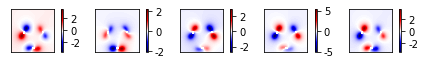

In [56]:
from scipy.io import loadmat
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.axes_grid1 import make_axes_locatable

field_imag = loadmat('ez_imag')['ez_imag']
field_real = loadmat('ez_real')['ez_real']

fig = plt.figure(1, figsize=[7,10])
tot_phases = [0, np.pi/4, np.pi/2, 3*np.pi/4, np.pi]
count=0
for i in tot_phases:
    count = count+1
    ax = fig.add_subplot(str(1)+str(len(tot_phases))+str(count), aspect='equal')

    phi=i
    Etot = field_real*np.cos(phi) + field_imag*np.sin(phi)
    plt.imshow(Etot,origin='lower',cmap='seismic')
    cbar_num_format = "%0.f"
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=.1)
    cbar = plt.colorbar(format=cbar_num_format,cax=cax)
    ax.set_yticks([]); ax.set_xticks([])

fig.subplots_adjust(wspace=0.6)
